In [1]:
import cv2;
import numpy as np;
from matplotlib import pyplot as plt;

import requests
import imutils

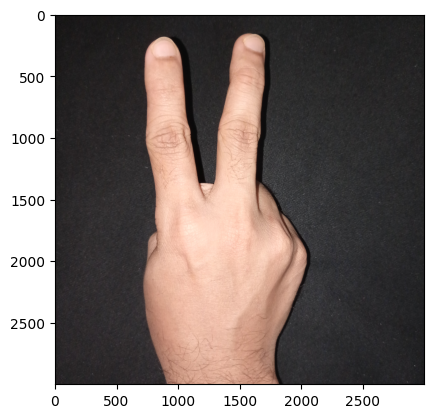

In [2]:
# simg = cv2.imread("mytest.jpg");
simg = cv2.imread("./demo_data/img/2/01.jpg");
plt.imshow(simg[:, :, ::-1], cmap="gray");

In [3]:
img = cv2.resize(simg, (52, 52));
mask = np.zeros(img.shape[:2], np.uint8)
bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)
rect = (1, 1, img.shape[0]-1, img.shape[1]-1)

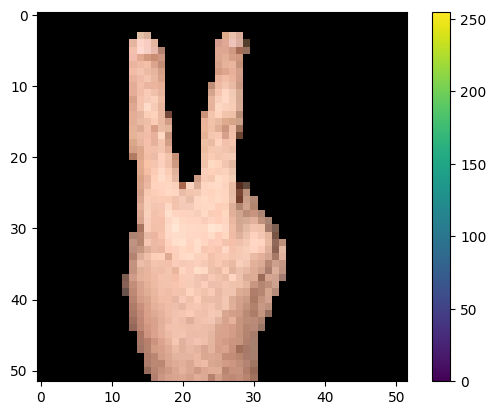

In [4]:
cv2.grabCut(img, mask, rect, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_RECT)
mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')
imggc = img * mask2[:, :, np.newaxis]
plt.imshow(imggc[:,:,::-1]), plt.colorbar(), plt.show();

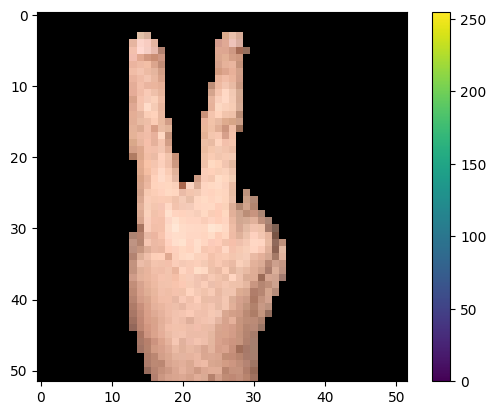

In [5]:
mask[0, :], mask[:, 0], mask[:, mask.shape[1]-1] = (cv2.GC_BGD,)*3;
mask3, bgdModel, fgdModel = cv2.grabCut(img,mask,None,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_MASK)
mask4 = np.where((mask3==2)|(mask3==0),0,1).astype('uint8')
imgf = img*mask4[:,:,np.newaxis]
plt.imshow(imgf[:,:,::-1]),plt.colorbar(),plt.show();

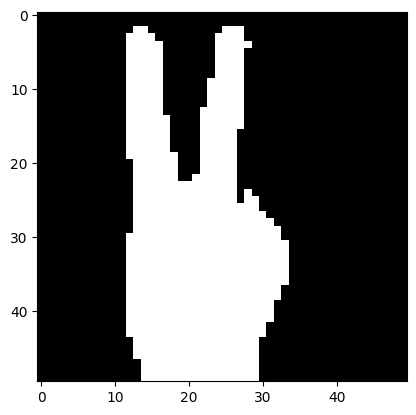

In [8]:
tmask = np.stack((mask4[1:-1, 1:-1]*255,)*3, axis=-1);
# tmask = cv2.flip(tmask, 1)
cv2.imwrite("testmask.jpg", tmask);
plt.imshow(tmask);

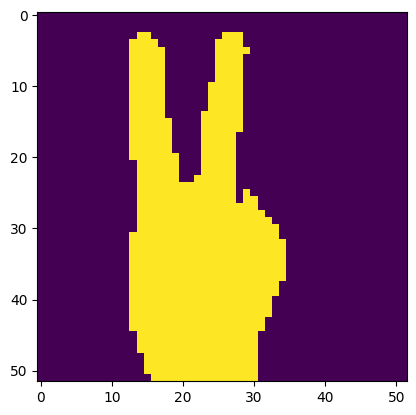

In [7]:
plt.imshow(mask4);